![](task1.jfif)

# This task is first for Simple Linear Regression

![](sparks.jfif)

In [1]:
#Import required libraries 
import pandas as pd
import numpy as np

#Import libraries for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#data given in URL

url = 'http://bit.ly/w-data'
url_data = pd.read_csv(url)

In [3]:
#show first five row
url_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#create dataframe

Hours=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8]
Scores=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
df = pd.DataFrame({"Hours":Hours,"Scores":Scores})
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#show number of row an dcolumns
df.shape

(25, 2)

In [6]:
#show columns's names
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
#show mean, min, std etc. values
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
#check null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

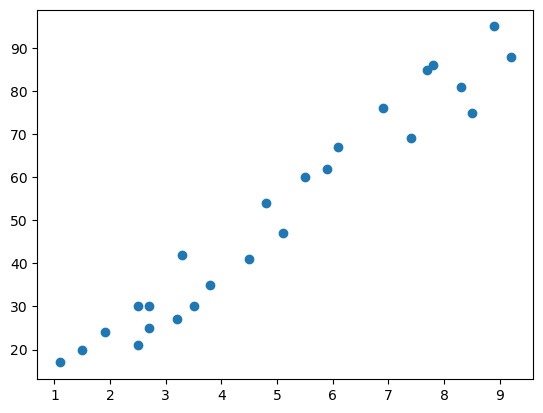

In [11]:
#plot a scatter plot which show data is liner or not
plt.scatter(x = df['Hours'], y = df['Scores'])

<p>Above grapgh clearly see there is a postitive linear realtion between Hours and scores.</p>

In [12]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data preparation

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df [['Hours']]  #this single square bracket solve 2D error
y=df['Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [15]:
X_train.shape, y_train.shape

((20, 1), (20,))

In [16]:
y_test.shape, y_test.shape

((5,), (5,))

# Training the algorithm

In [17]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train, y_train) 

print("Training complete.........")

Training complete.........


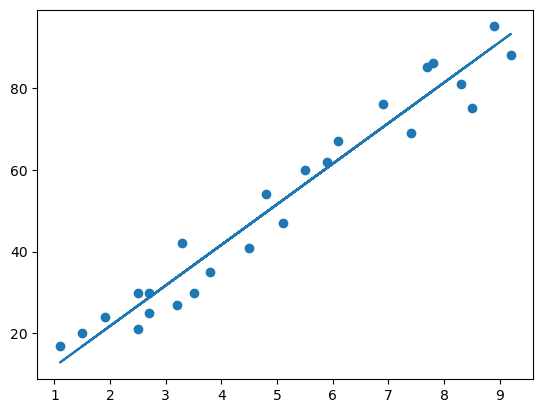

In [18]:
# ploting the regression line
line = lr.coef_* X +lr.intercept_

#Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

In [19]:
lr.coef_

array([9.91065648])

In [20]:
pred = lr.predict(X_test)

In [21]:
#calculate the accuracy MAE, MSE, RMSE
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Square Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 4.183859899002975
Mean Square Error: 21.5987693072174
Root Mean Square Error: 4.6474476121003665


In [22]:
#value of R square
lr.score(X,y)

0.9526947647057274

In [23]:
#ajd-R square(always check this for Liner Regression,1 means best accuracy)
adjrsquare=1-(1-lr.score(X,y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjrsquare)

0.950638015345107


In [24]:
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [25]:
#predict the actula value and predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


# Thank You..